In [1]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset, read the file
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# inspect housingInfo dataframe
#Understand the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Sum of null value
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [5]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'

In [6]:
# dataframe with features having null values
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


In [7]:
# we will drop the 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu'column 
# there are more than 45%  missing values and id and MoSold column is not required
df = df.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu','MoSold'],axis=1)

In [8]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,
LotFrontage,17.74
GarageType,5.55
GarageCond,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtFinType1,2.53


In [9]:
#Categorical columns

categorical_features = df.select_dtypes(include='object').columns

print('Number of Categorical Variable', len(categorical_features))

df[df.select_dtypes(include='object').columns].head()

Number of Categorical Variable 38


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [10]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of categories are 5
The feature is ExterQual and number of 

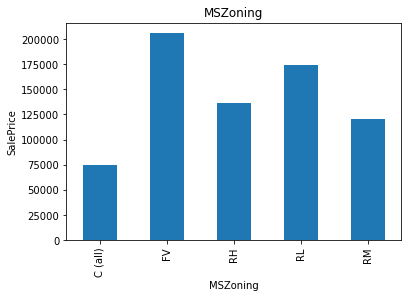

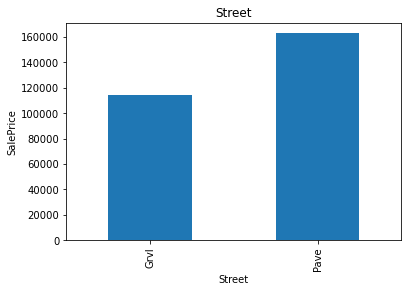

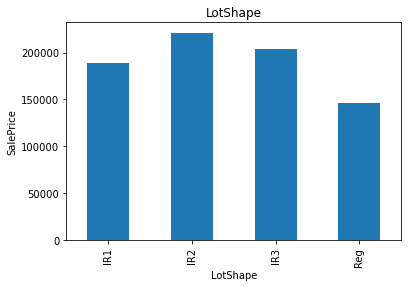

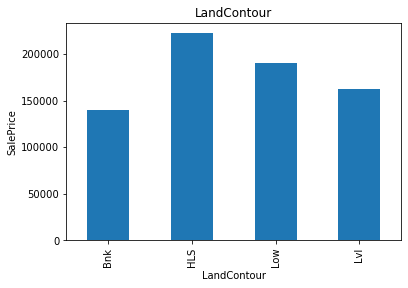

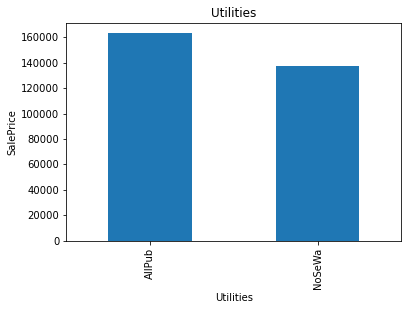

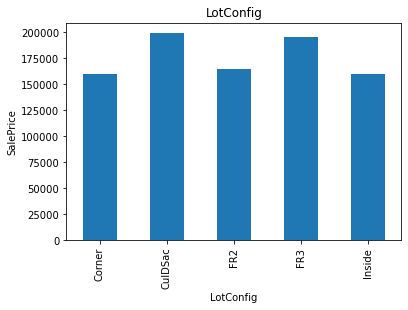

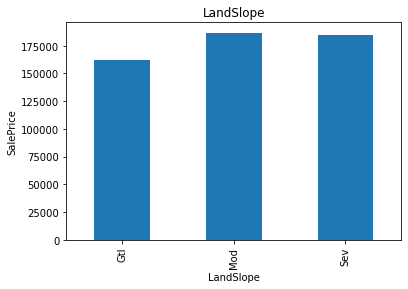

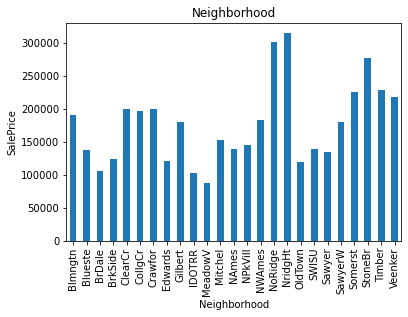

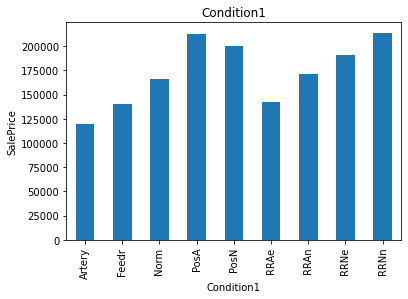

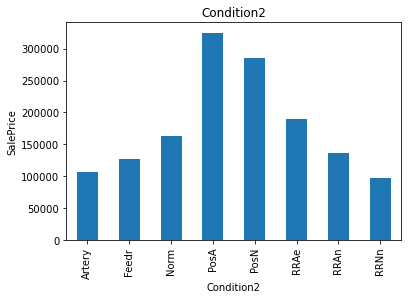

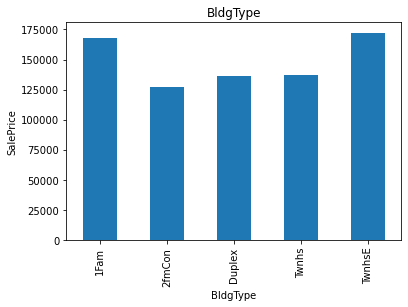

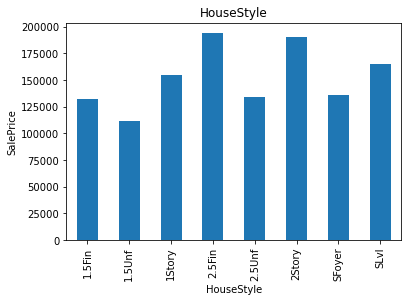

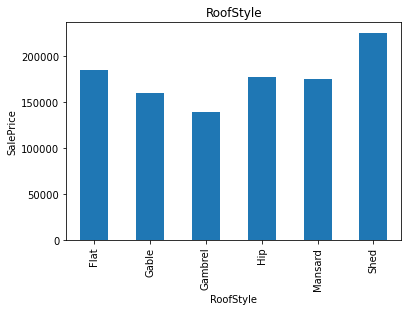

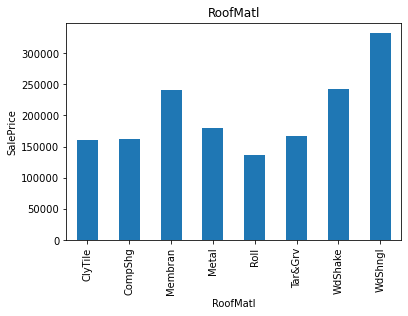

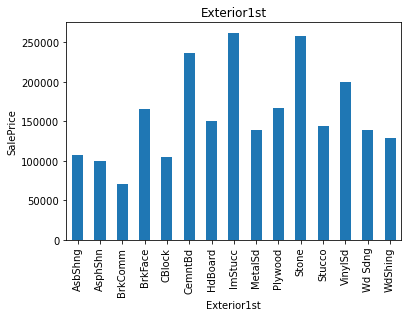

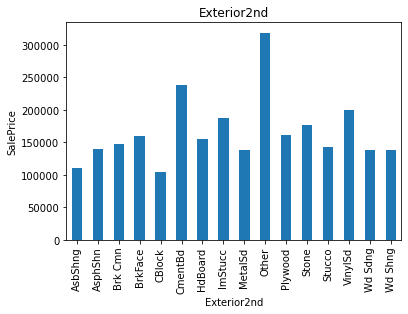

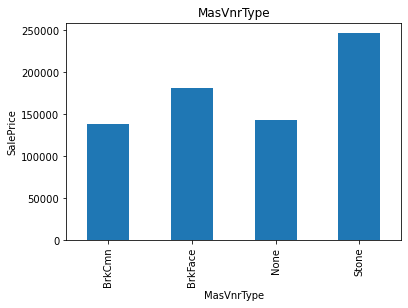

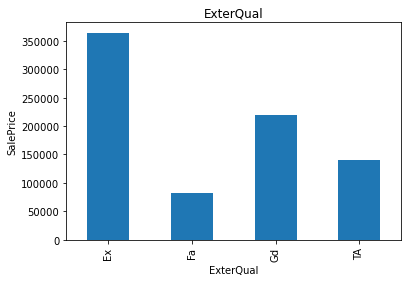

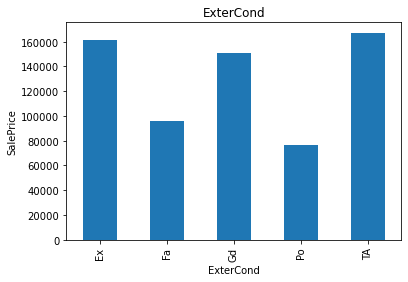

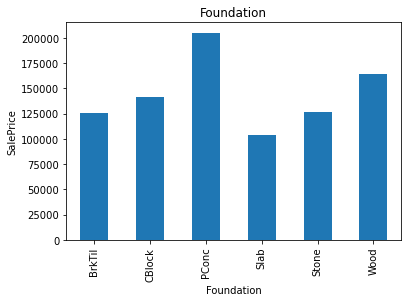

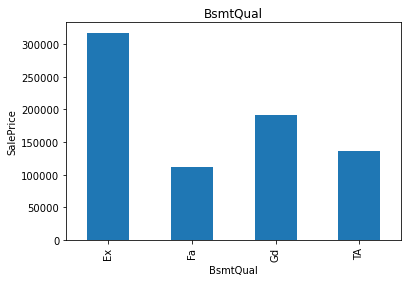

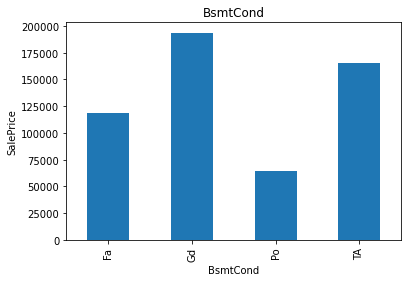

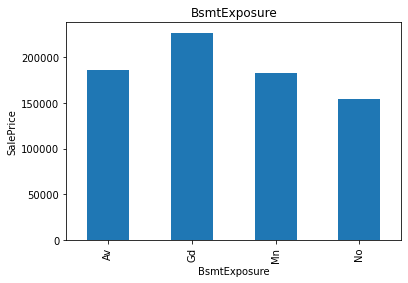

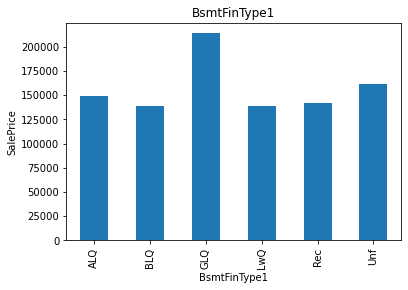

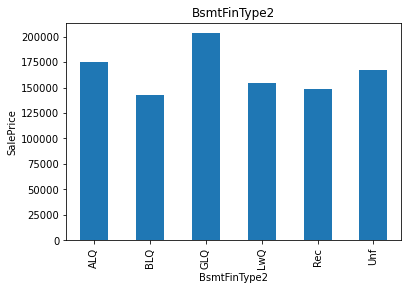

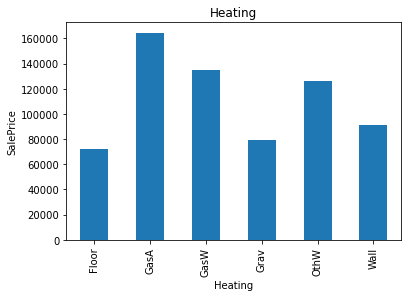

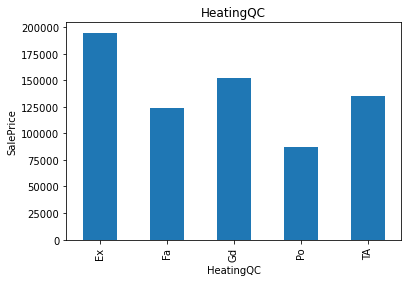

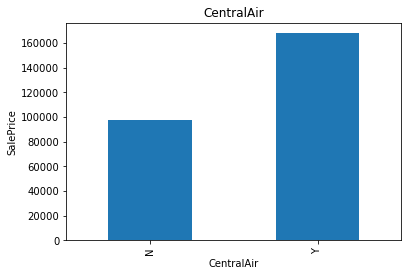

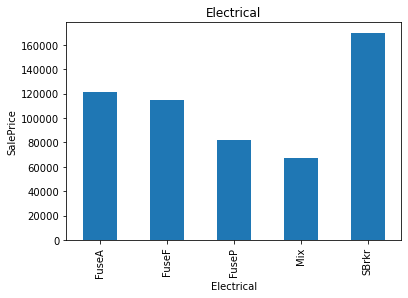

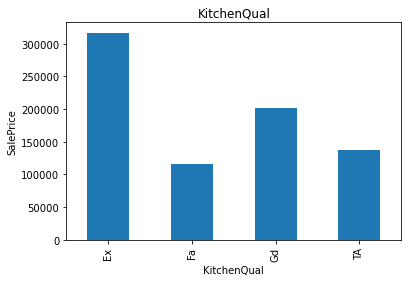

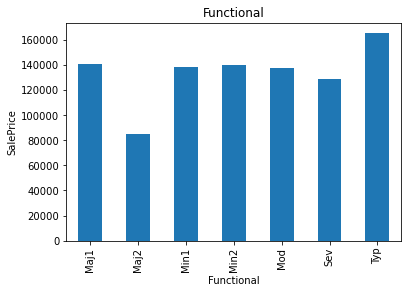

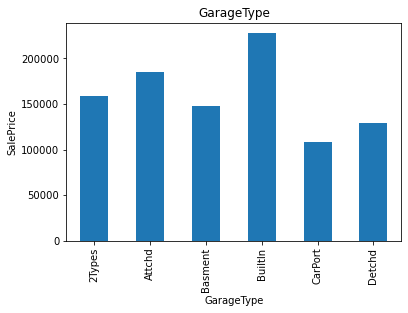

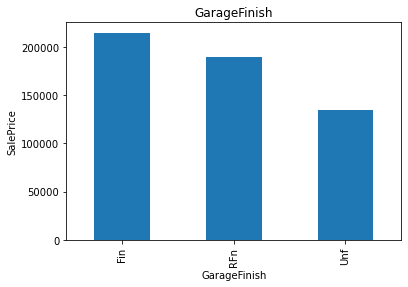

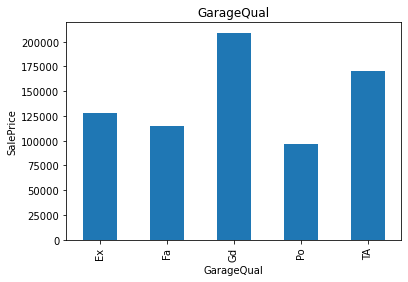

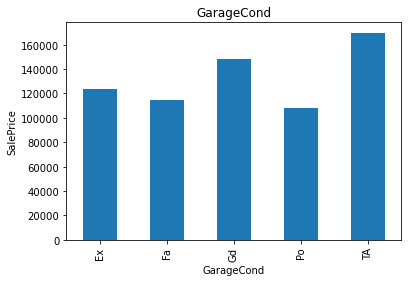

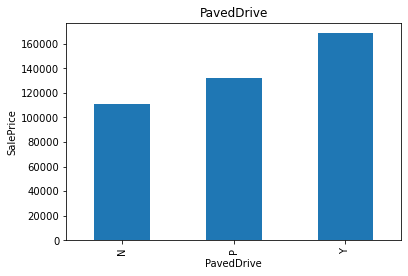

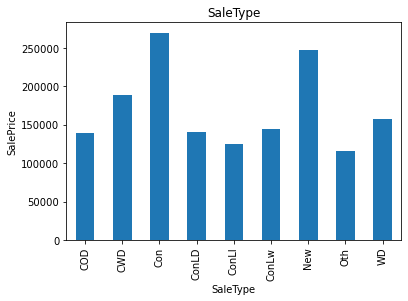

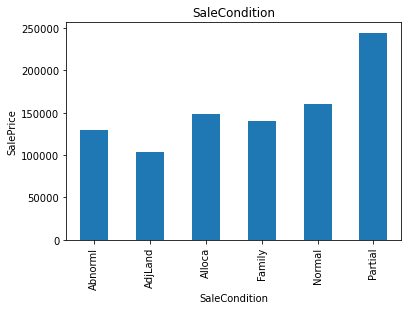

In [11]:
## look at the relationship between categorical variable and dependent feature SalesPrice

for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [12]:
# Numeric columns
numerical_features = df.select_dtypes(exclude='object').columns

print('Number of Numerical Variable', len(numerical_features))
df[df.select_dtypes(exclude='object').columns].head()

Number of Numerical Variable 36


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,2008,250000


In [13]:
# list of year time variable in numerical feature

year_feature=[feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature ]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [14]:
# Drop these time-year feature from numerical_features

numerical_features=numerical_features.drop(year_feature)
len(numerical_features)

32

In [15]:
# lets explore the year variable

for feature in year_feature:
    print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs year sold')

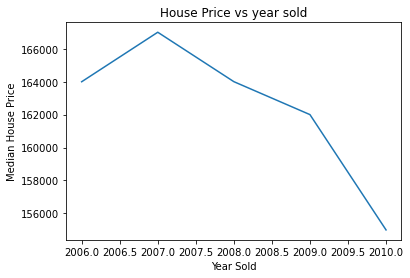

In [16]:
# let analyze datetime variable
# also check yearsold and sales price have any relation

df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs year sold')

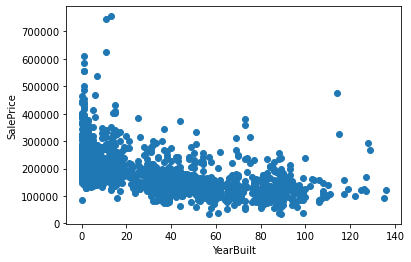

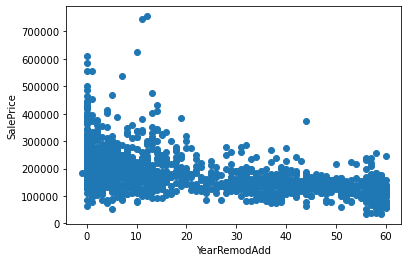

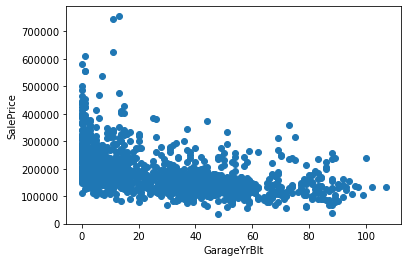

In [17]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=df.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [18]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df[feature]=df['YrSold']-df[feature]

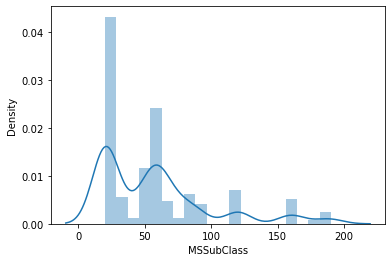

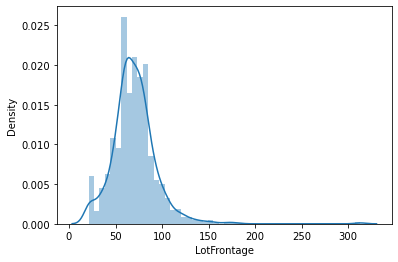

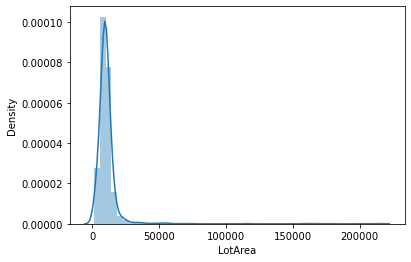

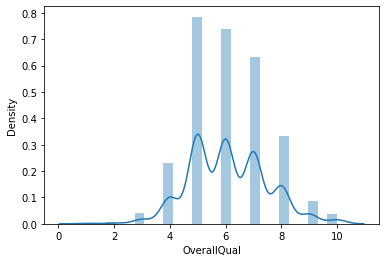

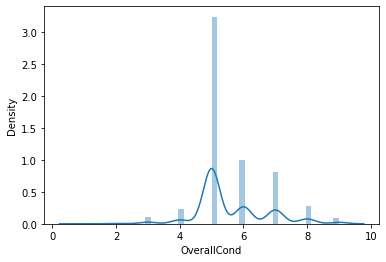

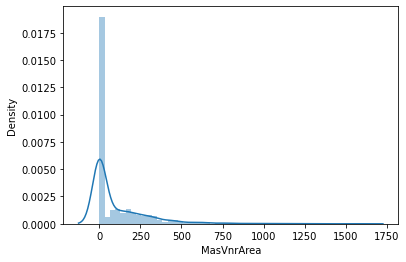

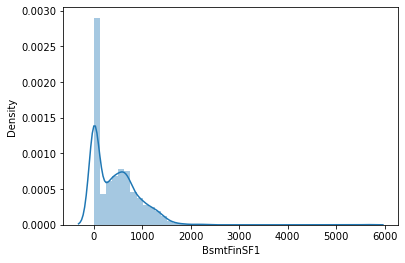

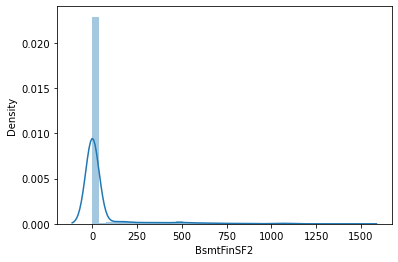

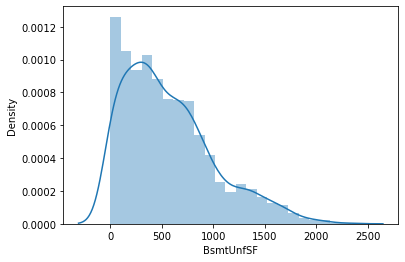

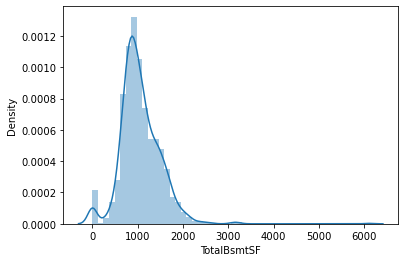

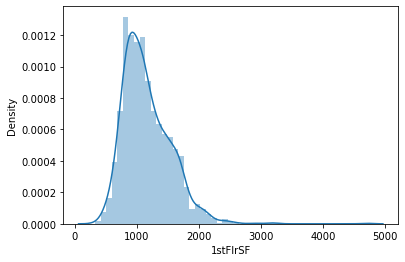

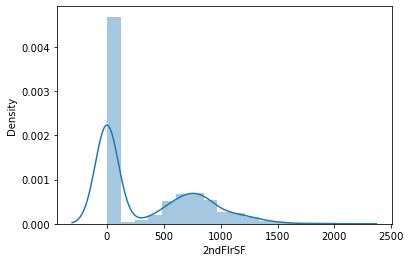

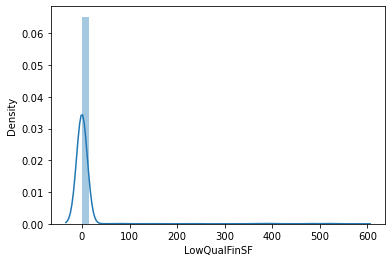

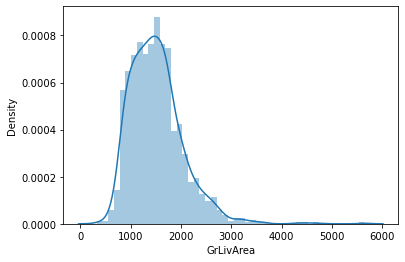

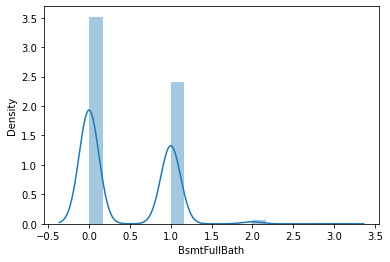

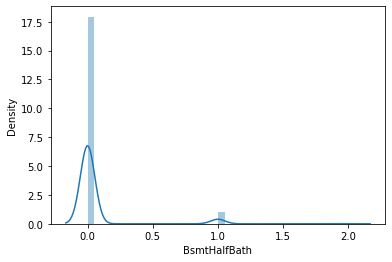

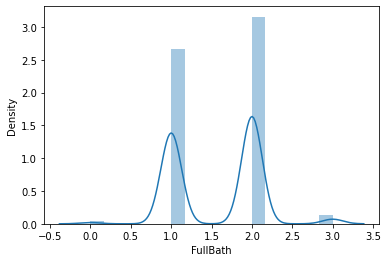

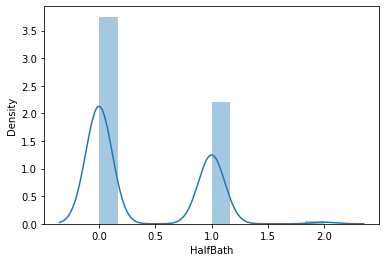

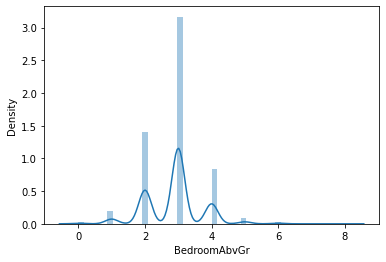

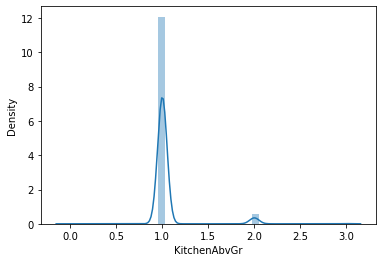

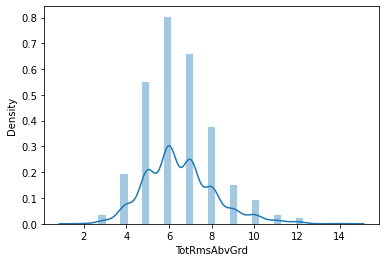

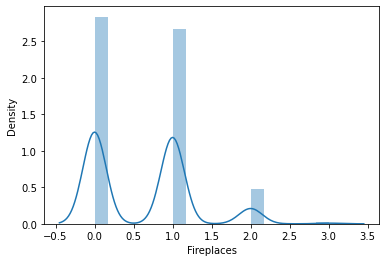

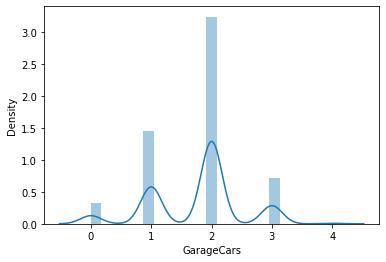

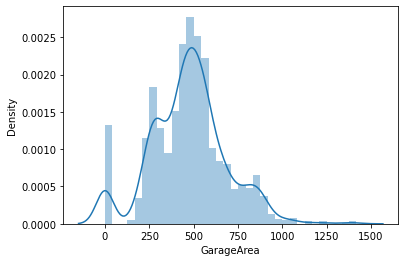

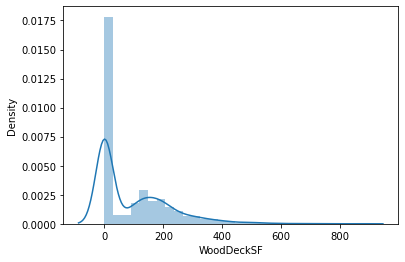

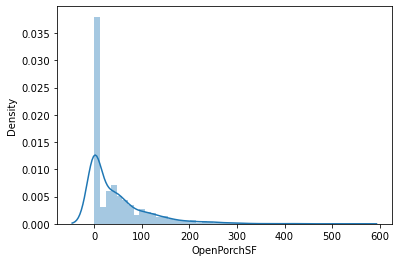

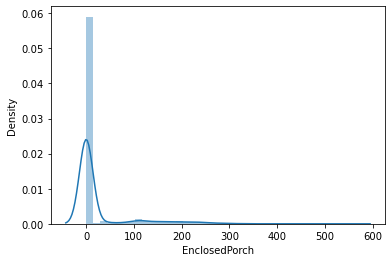

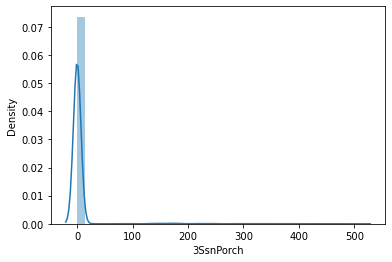

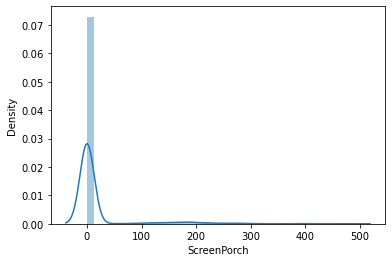

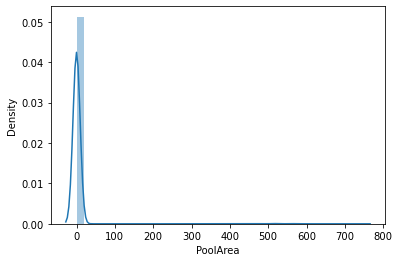

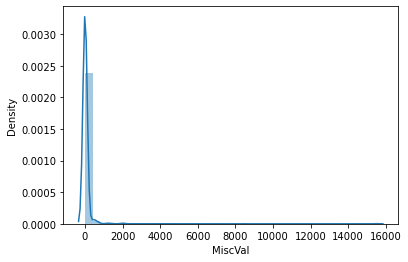

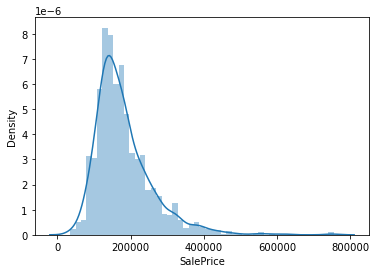

In [19]:
for feature in numerical_features:
    data=df.copy()
    sns.distplot(data[feature])
    plt.show()

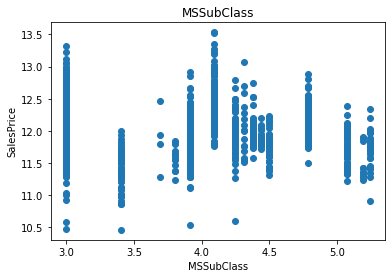

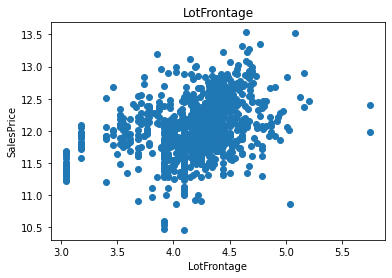

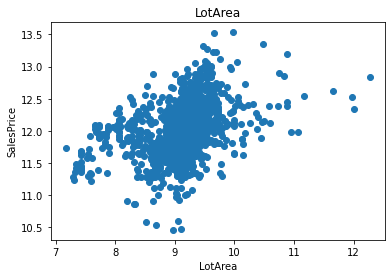

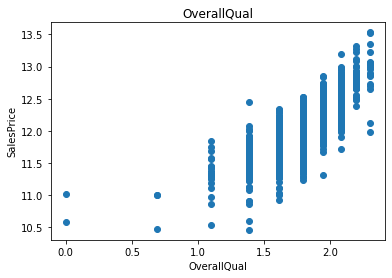

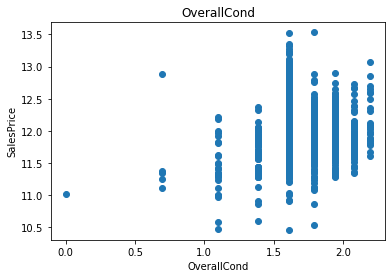

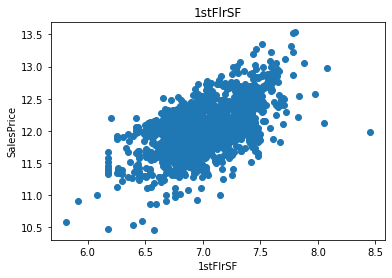

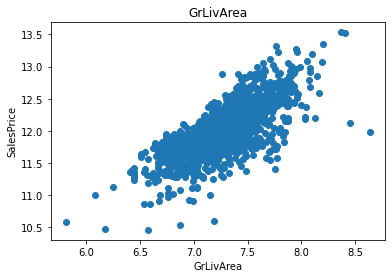

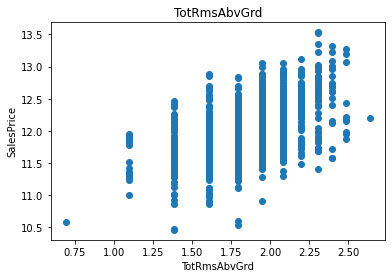

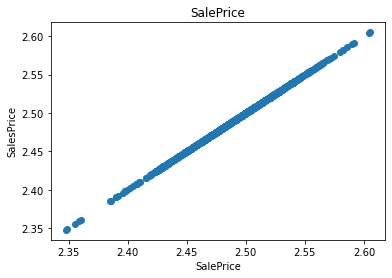

In [20]:
### since data are not normally distributed we will be using logarithomic transformation

for feature in numerical_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

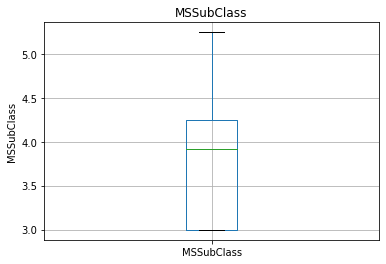

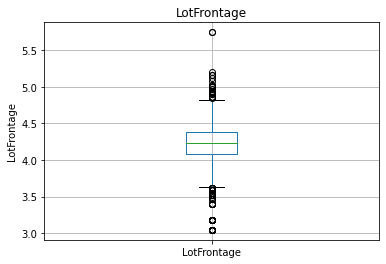

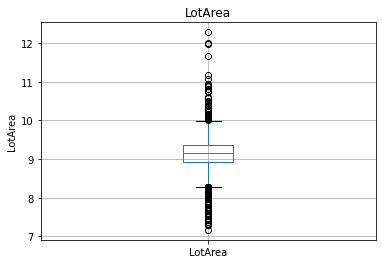

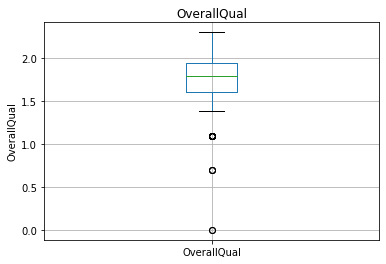

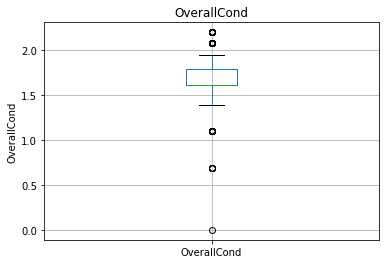

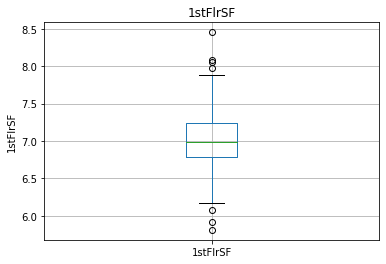

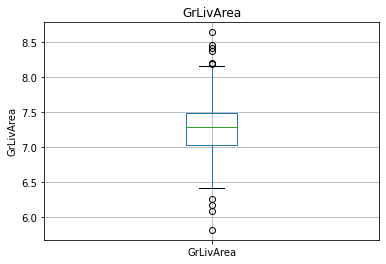

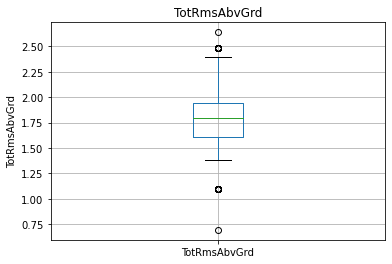

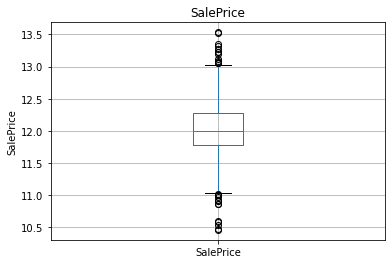

In [21]:
# Outliers

for feature in numerical_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Data Cleaning

In [22]:
# lets observe the columsn with highest percentage of missing values
print('The unique values in columsn with highest number if nan or missing values')
print('\n')
print('LotFrontage: ',df['LotFrontage'].value_counts())
print('\n')
print('GarageCond: ',df['GarageCond'].value_counts())
print('\n')
print('GarageType: ',df['GarageType'].value_counts())
print('\n')
print('GarageYrBlt: ',df['GarageYrBlt'].value_counts())
print('\n')
print('GarageFinish: ',df['GarageFinish'].value_counts())
print('\n')
print('GarageQual: ',df['GarageQual'].value_counts())
print('\n')
print('BsmtExposure: ',df['BsmtExposure'].value_counts())
print('\n')
print('BsmtFinType2: ',df['BsmtFinType2'].value_counts())
print('\n')
print('BsmtFinType1: ',df['BsmtFinType1'].value_counts())
print('\n')
print('BsmtCond: ',df['BsmtCond'].value_counts())
print('\n')
print('BsmtQual: ',df['BsmtQual'].value_counts())
print('\n')
print('MasVnrArea: ',df['MasVnrArea'].value_counts())
print('\n')
print('MasVnrType: ',df['MasVnrType'].value_counts())
print('\n')
print('Electrical: ',df['Electrical'].value_counts())

The unique values in columsn with highest number if nan or missing values


LotFrontage:  60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4


In [23]:
# for the LotFrontage column and GarageYrBlt we will impute the missing values with the median 
# since the feature contains outliers
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

# for the "below columns" we will impute the null values with 'mode'
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual'):
    
    df[col] = df[col].fillna(df[col].mode()[0])
    
# for the "Bsmt" columns we will impute the null values with 'mode'
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual'):
    
    df[col] = df[col].fillna(df[col].mode()[0])
    
# for the columns we will impute the null values with 'mode'

for col in ('MasVnrArea', 'MasVnrType', 'Electrical'):
    
    df[col] = df[col].fillna(df[col].mode()[0])


In [24]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,


In [25]:
df.shape

(1460, 74)

### Dummy Variable Creation

In [26]:
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [27]:
# Convert categorical value into Dummy variable
df=pd.get_dummies(df,drop_first=True)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,5,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,5.0,2,548,0,61,0,0,0,0,0,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

### Splitting the Data into Train and Test sets

In [28]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [29]:
#Split the data into train and test
y = df.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [30]:
X = df
X.shape

(1460, 231)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (978, 231)
X_test shape (482, 231)
y_train shape (978,)
y_test shape (482,)


### Scaling of numerical varaibles

In [33]:
# columns to be scaled
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold'], dtype='object')

In [34]:
num_vars= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
           'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
           'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold']
X_train[num_vars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,YrSold
615,85,80.0,8800,6,7,47,47,156.0,763,0,173,936,1054,0,0,1054,1,0,1,0,3,1,6,0,47.0,2,480,120,0,0,0,2010
613,20,70.0,8402,5,5,0,0,0.0,206,0,914,1120,1120,0,0,1120,0,0,1,0,3,1,6,0,28.0,0,0,0,30,0,0,2007
1303,20,73.0,8688,7,5,1,1,228.0,0,0,1616,1616,1616,0,0,1616,0,0,2,0,3,1,7,0,1.0,3,834,208,59,0,0,2006
486,20,79.0,10289,5,7,42,42,168.0,836,0,237,1073,1073,0,0,1073,1,0,1,1,3,1,6,0,42.0,2,515,0,0,0,0,2007
561,20,77.0,10010,5,5,32,31,0.0,1071,123,195,1389,1389,0,0,1389,1,0,1,0,2,1,6,1,31.0,2,418,240,38,0,0,2006


In [35]:
#Scaling using MinMax

from sklearn.preprocessing import StandardScaler,MinMaxScaler

#scaler = StandardScaler()
scaler=MinMaxScaler()

In [36]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

### Model Building and Evaluation
- we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

### RFE
- Recursive feature elimination

In [37]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=80)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [39]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 70),
 ('LotFrontage', False, 145),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 27),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 11),
 ('BsmtHalfBath', False, 113),
 ('FullBath', False, 17),
 ('HalfBath', False, 106),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 135),
 ('GarageYrBlt', False, 120),
 ('GarageCars', False, 69),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 28),
 ('OpenPorchSF', False, 124),
 ('EnclosedPorch', False, 111),
 ('3SsnPorch', False, 144),
 ('ScreenPorch', True, 1),
 ('PoolArea', False, 146),
 ('MiscVal', False, 147),
 ('YrSold', False, 123),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', F

In [40]:
# Extract the top features

col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'ScreenPorch', 'MSZoning_FV', 'Street_Pave', 'LandContour_HLS', 'Utilities_NoSeWa', 'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Condition1_RRAe', 'Condition2_PosN', 'Condition2_RRAe', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_CBlock', 'Exterior1st_Wd Sdng', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Exterior2nd_Wd Sdng', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundat

In [41]:
# Extract the non-important features

X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       ...
       'SaleType_CWD', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Family', 'SaleCondition_Normal'], dtype='object', length=151)

In [42]:
#Check the shape of train and test
X_train1=X_train[col]
X_test1=X_test[col]
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(978, 80)
(482, 80)
(978,)
(482,)


In [43]:
lm1=lm.fit(X_train, y_train)

In [44]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

-561640.9931729482
[ 2.54700067e+04 -6.96366912e+01  1.68175396e+05  6.27602421e+04
  3.64779096e+04 -3.53550224e+04 -9.38755049e+03  3.18330570e+04
  8.90940409e+04  9.32965704e+03  1.68558496e+03  8.46642908e+04
  8.78239961e+04  6.15324341e+04 -1.14002508e+03  9.30578082e+04
  8.35766755e+03 -2.58807957e+03  1.32584137e+04  3.56214031e+03
 -2.19194889e+04 -3.17156082e+04  2.67161590e+04  9.16281805e+03
  7.78498739e+02  2.93137167e+03  4.50957845e+04  1.26577219e+04
  1.15271517e+03  5.59826428e+03  4.64607863e+01  2.22179315e+04
  4.86581114e+00 -3.56470996e-01  2.07245718e+03  3.56037402e+04
  1.95702571e+04  2.30815222e+04  2.30876813e+04  6.22896981e+04
  2.62497962e+03  6.45865881e+03  2.23657701e+03  1.77874704e+04
 -9.17021505e+03  8.09781755e+03 -2.79563933e+04  8.60825078e+03
 -8.60679732e+03 -2.01071168e+04 -5.50881963e+02  4.87518648e+03
 -4.40486421e+04 -9.04672786e+03 -5.11324241e+03 -1.24001312e+04
 -1.59200946e+04 -1.34311051e+04  1.34010228e+03 -2.72475340e+04
 -1.47

In [45]:
#import libraries for model evalution
from sklearn.metrics import r2_score, mean_squared_error

In [46]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9196798669289905
0.7572535171211912
455360042635.49023
858970721330.407
465603315.5782109
1782096932.2207613


- Train is score is high but Test Score lower, Overfitting issue in Linear Model.

### Ridge and Lasso Regression

In [47]:
from sklearn.linear_model import Ridge,Lasso

#### Ridge

In [48]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 0.1}
-18707.300737981877


In [50]:
alpha = 0.1
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([ 103424.21138462,   88335.41914421,   43492.00871427,
        -34871.34635838,   22388.42587176,   56982.32042962,
          6104.24412638,   -6575.29259215,   51248.4150802 ,
        112403.18951076,   31878.11668654,   -3195.55084342,
        102859.77033566,  -44003.80793252,  -42110.74609653,
         53843.74411114,   38823.42245638,   31247.55104714,
         17267.79778231,   44629.62052147,   20048.46522738,
        -53281.98343517,  -20826.28034218,   -6985.12308358,
        -15269.48813964,  -17220.23176634,  -12142.90163514,
        -10986.02552791,   41379.71870088,   30213.51996012,
        -18112.17358266,   44836.42924594,  -20008.13432354,
       -182285.45485251,  -43648.27433357,  -10946.00598636,
        -33510.12340353,  -24298.88333121,   25515.82416968,
         36054.49614277,  321374.41168354,  300427.10366577,
        294331.34892092,  316736.69310864,  300714.32842708,
        355657.72767644,   -9588.90495422,  -14615.84072254,
         12887.01799282,

In [51]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.908400580199604
0.843026300257723
519305859077.9332
555459385027.8079
530987585.9692569
1152405363.128232


#### Lasso

In [52]:
# cross validation
lasso = Lasso()

lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 20}
-18486.03715211532


In [54]:
alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 

Lasso(alpha=20)

In [55]:
lasso.coef_

array([ 9.41304343e+04,  8.88330999e+04,  4.44598037e+04, -3.68342257e+04,
        2.03533640e+04,  8.16953186e+04,  6.75144503e+03, -0.00000000e+00,
        4.08115449e+04,  4.83953449e+04,  4.97383427e+03, -7.01921968e+03,
        1.99189879e+05, -4.08482324e+04, -4.02970325e+04,  4.49203298e+04,
        4.00390828e+04,  2.94220826e+04,  1.56592468e+04,  3.88225125e+04,
        1.96542949e+04, -3.47187239e+04, -1.39112274e+04, -1.79510784e+03,
       -1.26610282e+04, -1.46258250e+04, -1.12469228e+04, -1.08475762e+04,
        3.90283411e+04,  2.82175003e+04, -1.67736548e+04,  4.09268003e+04,
       -1.79138958e+04, -1.89745257e+05, -0.00000000e+00, -1.06926794e+04,
       -3.13386311e+04, -2.28786876e+04,  2.21028794e+04,  0.00000000e+00,
        4.17257319e+05,  4.02557012e+05,  4.02172519e+05,  4.12054338e+05,
        4.17325004e+05,  4.68303776e+05, -8.29400306e+01, -1.25432450e+04,
        3.28472591e+03, -6.22583590e-03, -0.00000000e+00,  1.33017064e+04,
       -1.54977906e+04, -

In [56]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.912401416306116
0.8272210956921159
496623863538.5552
611386901692.4758
507795361.4913652
1268437555.3785806


In [57]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.196799e-01,9.084006e-01,9.124014e-01
1,R2 Score (Test),7.572535e-01,8.430263e-01,8.272211e-01
2,RSS (Train),4.553600e+11,5.193059e+11,4.966239e+11
3,RSS (Test),8.589707e+11,5.554594e+11,6.113869e+11
4,MSE (Train),2.157784e+04,2.304317e+04,2.253432e+04
5,MSE (Test),4.221489e+04,3.394710e+04,3.561513e+04


### Model Evaluation
- The r2_score of lasso is slightly higher than ridge for the test dataset

In [58]:
ridge_pred = ridge.predict(X_test1)

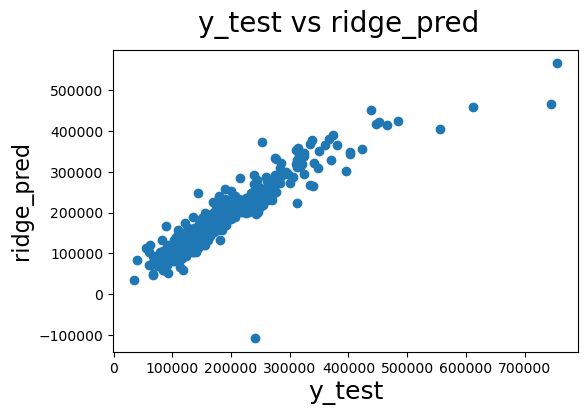

In [59]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)          # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

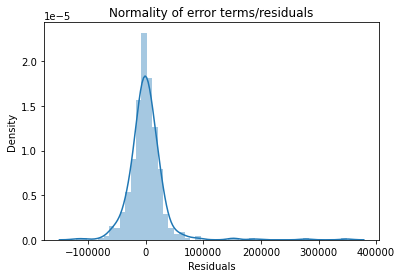

In [60]:
# Distribution of errors

y_res=y_test-ridge_pred

sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [61]:
lasso_pred = lasso.predict(X_test1)

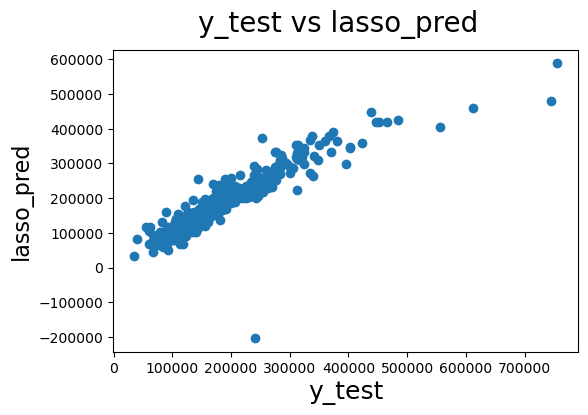

In [62]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)      # Plot heading 
plt.xlabel('y_test', fontsize=18)                      # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

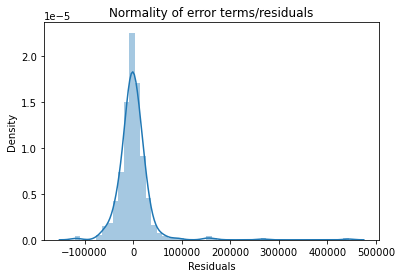

In [63]:
# Distribution of errors

y_res=y_test-lasso_pred

sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

- Can See the changes in the coefficients after regularization

In [64]:
betas = pd.DataFrame(index=X_train1.columns)

In [65]:
betas.rows = X_train1.columns

In [66]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [67]:
pd.set_option('display.max_rows', None)
betas.sort_values(by='Lasso',ascending=False)

,Ridge,Lasso
RoofMatl_WdShngl,355657.727676,468303.775542
RoofMatl_WdShake,300714.328427,417325.003612
RoofMatl_CompShg,321374.411684,417257.318758
RoofMatl_Tar&Grv,316736.693109,412054.337527
RoofMatl_Metal,300427.103666,402557.011541
RoofMatl_Roll,294331.348921,402172.518681
GrLivArea,102859.770336,199189.879250
LotArea,103424.211385,94130.434341
OverallQual,88335.419144,88833.099913
BsmtFinSF1,56982.320430,81695.318643


- RoofMatl_WdShngl	
- RoofMatl_WdShake	
- RoofMatl_CompShg	
- RoofMatl_Tar&Grv	
-  RoofMatl_Metal	
- RoofMatl_Roll	
- GrLivArea	
- LotArea	
- OverallQual	
- BsmtFinSF1	
- SaleType_Con	
- 1stFlrSF	
- TotRmsAbvGrd	
- OverallCond	
- Neighborhood_StoneBr	
- TotalBsmtSF	
- GarageArea	
- Neighborhood_NoRidge	
- Street_Pave	
- SaleCondition_Alloca	

### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Answer
The optimal value of alpha for ridge and lasso regression

- For Ridge Regression Alpha- 0.1

- For Lasso Alpha Regression- 20

In [68]:
#if the alpha value is being double for ridge model
alpha = 0.2
ridge_double = Ridge(alpha=alpha)
ridge_double.fit(X_train1, y_train)

Ridge(alpha=0.2)

In [69]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_double.predict(X_train1)
y_pred_test = ridge_double.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

#0.91 R2 Train Score at Alpha 0.1
#0.84 R2 Test Score at Alpha 0.1  


0.8995678583029585
0.8557333234670573


- R2 Train score descreased but Test Score increased at Alpha 0.2 value

In [70]:
#if the alpha value is being double for lasso model
alpha =40
lasso_double = Lasso(alpha=alpha)
lasso_double.fit(X_train1, y_train)

Lasso(alpha=40)

In [71]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso_double.predict(X_train1)
y_pred_test = lasso_double.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

#0.91 R2 Train Score at Alpha 20
#0.83 R2 Test Score at Alpha 20

0.8974626672742007
0.8576233815952057


- For Lasso Model R2 Train score decreased but test score is increased little bit.

In [72]:
#important predictor variables
betas = pd.DataFrame(index=X_train1.columns)
betas.rows = X_train1.columns

betas['Ridge'] = ridge.coef_
betas['Ridge_double'] = ridge_double.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso_double'] = lasso_double.coef_
pd.set_option('display.max_rows', None)
betas.sort_values(by ='Lasso_double', ascending=False)

,Ridge,Ridge_double,Lasso,Lasso_double
RoofMatl_WdShngl,355657.727676,258470.322158,468303.775542,283617.804992
RoofMatl_CompShg,321374.411684,221753.549198,417257.318758,233559.358588
RoofMatl_WdShake,300714.328427,197137.144468,417325.003612,225471.604237
RoofMatl_Tar&Grv,316736.693109,214294.095383,412054.337527,222995.335073
RoofMatl_Roll,294331.348921,186118.215864,402172.518681,197746.925310
RoofMatl_Metal,300427.103666,183168.836503,402557.011541,195641.008115
GrLivArea,102859.770336,95929.514618,199189.879250,178547.940983
OverallQual,88335.419144,91078.558116,88833.099913,96745.449985
LotArea,103424.211385,84737.844587,94130.434341,79504.864468
BsmtFinSF1,56982.320430,44885.054646,81695.318643,65655.575662


#### The variable are same but cofficient values are chnaged.
- RoofMatl_WdShngl	
- RoofMatl_CompShg	
- RoofMatl_WdShake	
- RoofMatl_Tar&Grv	
- RoofMatl_Roll	
- RoofMatl_Metal	
- GrLivArea	
- OverallQual	
- LotArea	
- BsmtFinSF1	
- 1stFlrSF	
- TotRmsAbvGrd	
- SaleType_Con	
- Neighborhood_StoneBr	
- Neighborhood_NoRidge	
- OverallCond	
- GarageArea	
- ScreenPorch	
- Neighborhood_NridgHt	


### Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Answer:

- Alpha Value for Ridge 0.1
- Alpha Value for Lasso 20
- for Ridge Train Score 0.92, Test Score 0.84
- for Lasso Train Score 0.92, Test Score 0.83

##### The r2 test score for Ridge Model at optimal value of lamda at- 0.1, is slightly higher than lasso for the test dataset, so we can choose ridge regression to predic the price of the house.

### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [73]:
X_train1.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'ScreenPorch', 'MSZoning_FV', 'Street_Pave', 'LandContour_HLS', 'Utilities_NoSeWa', 'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Condition1_RRAe', 'Condition2_PosN', 'Condition2_RRAe', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_CBlock', 'Exterior1st_Wd Sdng', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Exterior2nd_Wd Sdng', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundat

In [74]:
y_train.head()

615     137500
613     147000
1303    232000
486     156000
561     170000
Name: SalePrice, dtype: int64

In [75]:
betas.sort_values(by='Lasso',ascending=False)

,Ridge,Ridge_double,Lasso,Lasso_double
RoofMatl_WdShngl,355657.727676,258470.322158,468303.775542,283617.804992
RoofMatl_WdShake,300714.328427,197137.144468,417325.003612,225471.604237
RoofMatl_CompShg,321374.411684,221753.549198,417257.318758,233559.358588
RoofMatl_Tar&Grv,316736.693109,214294.095383,412054.337527,222995.335073
RoofMatl_Metal,300427.103666,183168.836503,402557.011541,195641.008115
RoofMatl_Roll,294331.348921,186118.215864,402172.518681,197746.925310
GrLivArea,102859.770336,95929.514618,199189.879250,178547.940983
LotArea,103424.211385,84737.844587,94130.434341,79504.864468
OverallQual,88335.419144,91078.558116,88833.099913,96745.449985
BsmtFinSF1,56982.320430,44885.054646,81695.318643,65655.575662


- Five most Imortant Prdictor 'RoofMatl_WdShngl','RoofMatl_WdShake','RoofMatl_CompShg','RoofMatl_Tar&Grv','RoofMatl_Metal'
	
	
	
	


In [76]:
# Lets drop this Prdictor
X_train2 = X_train1.drop(['RoofMatl_WdShngl','RoofMatl_WdShake','RoofMatl_CompShg','RoofMatl_Tar&Grv',
                          'RoofMatl_Metal'],axis=1)
X_test2 = X_test1.drop(['RoofMatl_WdShngl','RoofMatl_WdShake','RoofMatl_CompShg','RoofMatl_Tar&Grv',
                        'RoofMatl_Metal'],axis=1)


In [77]:
# cross validation
lasso = Lasso()

lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train2, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
print(lasso_model_cv.best_params_)

{'alpha': 20}


In [79]:
alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train2, y_train) 

Lasso(alpha=20)

In [80]:
y_pred_train = lasso.predict(X_train2)
y_pred_test = lasso.predict(X_test2)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

0.8717478387366303
0.8561133316169952


- R2 score for both Train and Test have been decreased

In [81]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train1.columns
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.sort_values(by='Lasso',ascending=False)

,Lasso
GrLivArea,139758.272692
OverallQual,101706.600821
LotArea,90484.867167
SaleType_Con,74917.792877
TotRmsAbvGrd,63942.496283
1stFlrSF,63072.605968
Neighborhood_NoRidge,48643.575113
Neighborhood_StoneBr,48309.283928
GarageArea,38780.377017
ScreenPorch,38660.042514


Most Important Predictor if most import predictor for ealier lasso model is not available in 

- GrLivArea	
- OverallQual	
- LotArea	
- SaleType_Con	
- TotRmsAbvGrd	
- 1stFlrSF	
- Neighborhood_NoRidge	
- Neighborhood_StoneBr
- GarageArea	

Question 4
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Answer: 
- A Model is robust when the model can handle well Changes,outliers, Noise in The unseen data, How accurately the model can predict,Model can manage well test accuracy in with little changes, different data then that is robust and generalisable, The Model accuracy have the more or less same implication if a model have high Train score and low test score that model can not be robust and generalisable.So that may have overfitting and underfitting issues.
